In [1]:
from cccn.noise import CrossCorrelation
from cccn.post_func import PostProcForNoise

[xumj:1696693] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.xumj.1002/jf.0/1089536000/shared_mem_cuda_pool.xumj could be created.
[xumj:1696693] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


In [2]:
cc = CrossCorrelation()
cc.clean()
for path in ['dataSAC/2008.010', 'dataSAC/2008.011']:
    cc.para.datapath=path
    cc.para.suffix = 'sac'
    cc.para.timeduration = 86400
    cc.para.target_dt = 1
    cc.read_sac()
    cc.perwhiten()
    cc.run_cc()

2024-10-15 13:47:15,844 - [CCCN][INFO]: Reading SAC files in dataSAC/2008.010
2024-10-15 13:47:15,973 - [CCCN][INFO]: Pre-processing CC_G01_Z
2024-10-15 13:47:15,984 - [CCCN][INFO]: Pre-processing CC_G06_Z
2024-10-15 13:47:15,992 - [CCCN][INFO]: Pre-processing CC_G10_Z
2024-10-15 13:47:16,004 - [CCCN][INFO]: Computing cross-correlation between CC_G01_CC_G06
2024-10-15 13:47:16,018 - [CCCN][INFO]: Computing cross-correlation between CC_G01_CC_G10
2024-10-15 13:47:16,028 - [CCCN][INFO]: Computing cross-correlation between CC_G06_CC_G10
2024-10-15 13:47:16,037 - [CCCN][INFO]: Reading SAC files in dataSAC/2008.011
2024-10-15 13:47:16,105 - [CCCN][INFO]: Pre-processing CC_G01_Z
2024-10-15 13:47:16,113 - [CCCN][INFO]: Pre-processing CC_G06_Z
2024-10-15 13:47:16,120 - [CCCN][INFO]: Pre-processing CC_G10_Z
2024-10-15 13:47:16,128 - [CCCN][INFO]: Computing cross-correlation between CC_G01_CC_G06
2024-10-15 13:47:16,133 - [CCCN][INFO]: Computing cross-correlation between CC_G01_CC_G10
2024-10-15

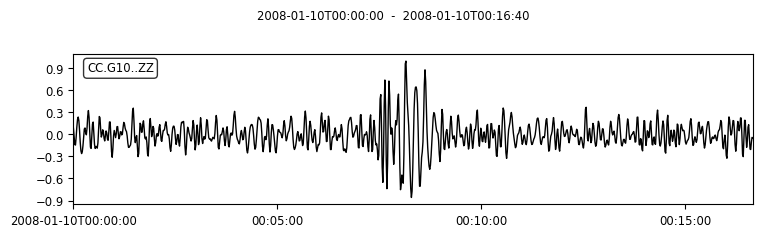

-0.052104772892172226


In [3]:
postfunc = PostProcForNoise('COR_CC_G01_CC_G10_ZZ.h5')
st = postfunc.stack_all()
st.plot()
postfunc.write_stack()